# Regression Tree

### Importing libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data

In [2]:
df = pd.read_csv('Movie_classification.csv',header = 0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.shape

(506, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


In [5]:
df.describe()['Time_taken']

count    494.000000
mean     157.391498
std       31.295161
min        0.000000
25%      132.300000
50%      160.000000
75%      181.890000
max      217.520000
Name: Time_taken, dtype: float64

In [6]:
df['Time_taken'].mean()

157.39149797570855

In [7]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(),inplace = True )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


In [9]:
df = pd.get_dummies(df,columns = ['3D_available','Genre'],drop_first = True)

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [11]:
df.shape

(506, 21)

In [12]:
x = df.loc[:,df.columns != 'Start_Tech_Oscar']
x.shape

(506, 20)

In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
y = df['Start_Tech_Oscar']
y.shape

(506,)

In [15]:
type(y)

pandas.core.series.Series

In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [17]:
x.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
Time_taken             float64
Twitter_hastags        float64
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
3D_available_YES         uint8
Genre_Comedy             uint8
Genre_Drama              uint8
Genre_Thriller           uint8
dtype: object

In [18]:
df.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
Time_taken             float64
Twitter_hastags        float64
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
3D_available_YES         uint8
Genre_Comedy             uint8
Genre_Drama              uint8
Genre_Thriller           uint8
dtype: object

### Test Train Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [20]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


### Regression tree -  Training the model 

In [21]:
from sklearn import tree

In [22]:
clt = tree.DecisionTreeClassifier( max_depth= 3)

In [23]:
clt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predicting using the trained model 

In [24]:
yhat_train = clt.predict(x_train)
yhat_test  = clt.predict(x_test)

In [25]:
yhat_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Model Performances

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
print('in sample accuracy_score:')
accuracy_score(y_test,yhat_test)

in sample accuracy_score:


0.5490196078431373

In [28]:
print('in sample confusion_matrix:')
confusion_matrix(y_test,yhat_test)

in sample confusion_matrix:


array([[39,  5],
       [41, 17]], dtype=int64)

In [29]:
print('out-sample accuracy_score:')
accuracy_score(y_test,yhat_test)

out-sample accuracy_score:


0.5490196078431373

In [30]:
print('out-sample confusion_matrix:')
confusion_matrix(y_test,yhat_test)

out-sample confusion_matrix:


array([[39,  5],
       [41, 17]], dtype=int64)

### Plotting Regression Tree

In [31]:
from IPython.display import Image
import pydotplus

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


In [32]:
dot_data = tree.export_graphviz(clt, out_file = None)


In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)


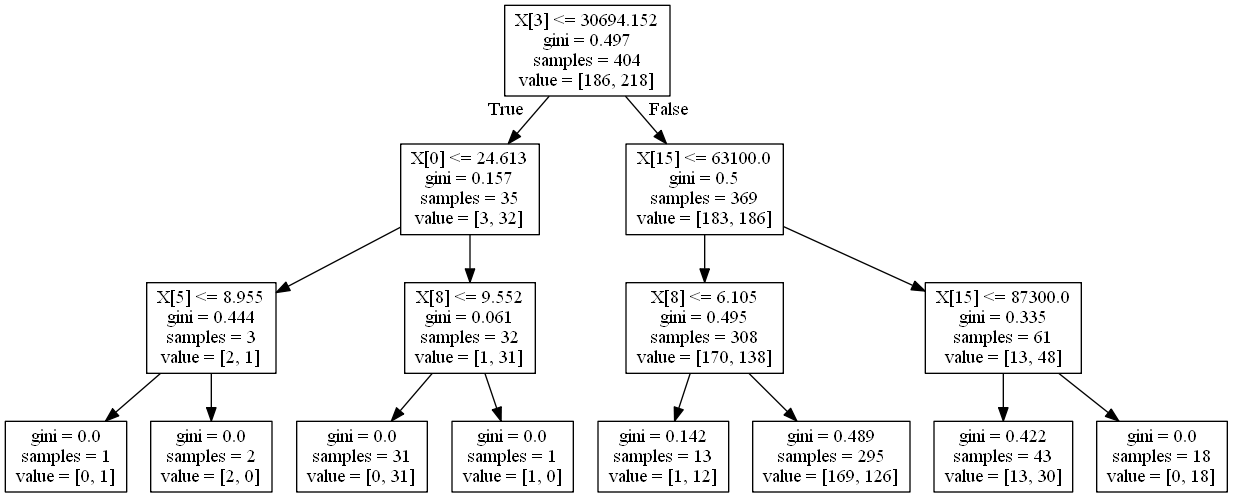

In [34]:
Image(graph.create_png())

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


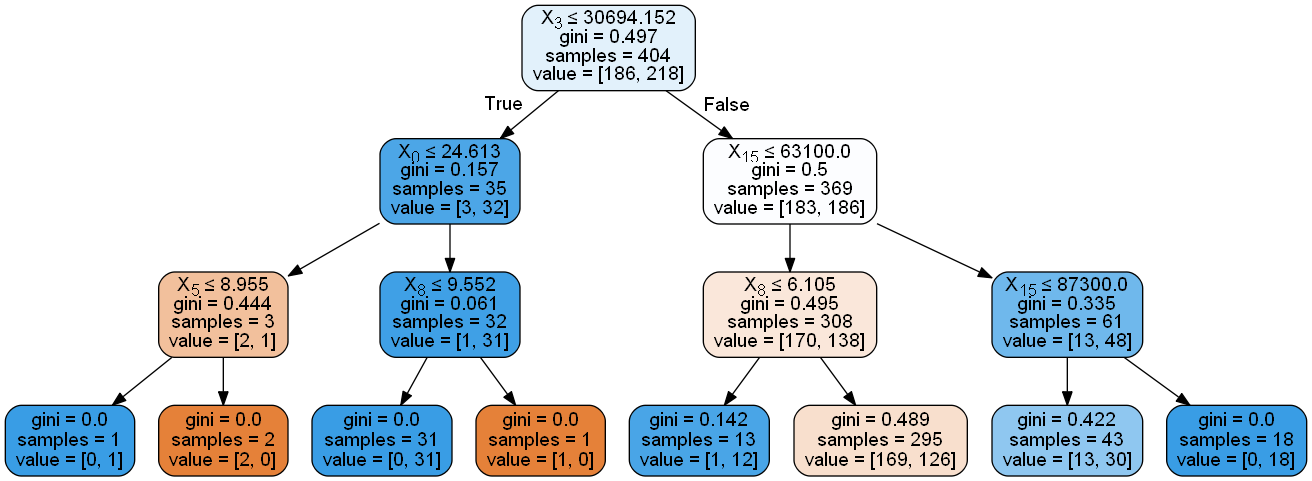

In [36]:
dot_data = StringIO()
export_graphviz(clt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Bagging

In [37]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()


In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
bag_clf = BaggingClassifier(base_estimator=clftree,n_estimators=1000,max_samples=1.0,max_features=1.0,bootstrap=True,bootstrap_features=False,
    oob_score=False,warm_start=False,n_jobs= -1,random_state= 0,
    verbose=0,)

In [40]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [41]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[28, 16],
       [21, 37]], dtype=int64)

In [42]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6372549019607843

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier(n_estimators = 1000,n_jobs = -1,random_state = 0)

In [45]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [47]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6274509803921569

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
rf_clf1 = RandomForestClassifier(n_estimators = 250, n_jobs = -1,random_state = 0)

In [50]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
               "min_samples_split" : [2,3,10]}

In [51]:
grid_search = GridSearchCV(rf_clf1,params_grid,n_jobs = -1,scoring = 'accuracy', cv = 5)

In [52]:
grid_search.estimator.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_feat

In [54]:
grid_search.best_params_

{'max_features': 8, 'min_samples_split': 3}

In [55]:
cvrf_clf = grid_search.best_estimator_

In [56]:
cvrf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6470588235294118

In [58]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[26, 18],
       [18, 40]], dtype=int64)

### Gradient Boosting 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()

In [61]:
 gbc.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
accuracy_score(y_test,gbc.predict(x_test))

0.5882352941176471

In [63]:
gbc2 = GradientBoostingClassifier(learning_rate=0.2,n_estimators= 1000, max_depth= 1)

In [64]:
gbc2.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
accuracy_score(y_test,gbc2.predict(x_test))

0.6176470588235294

In [66]:
accuracy_score(y_train,gbc2.predict(x_train))

0.9331683168316832

In [67]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators' :[500,750,1000],
              'max_depth' : [1,2,3,4,5],
              'learning_rate' : [0.1,0.2,0.3,0.4]}
gbc3 = GradientBoostingClassifier()
grid = GridSearchCV(gbc3,params_grid,scoring='accuracy',n_jobs = -1, cv = 5)

In [68]:
grid.fit(x_train,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [69]:
grid.best_params_

{'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 1000}

In [70]:
gbc4 = grid.best_estimator_

In [71]:
gbc4.fit(x_train,y_train)

accuracy_score(y_test,gbc4.predict(x_test))

0.5686274509803921

### AdaBoosting

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
abc = AdaBoostClassifier(learning_rate=0.2,n_estimators= 5000)

In [74]:
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=5000, random_state=None)

In [75]:
accuracy_score(y_train,abc.predict(x_train))

1.0

In [76]:
accuracy_score(y_test,abc.predict(x_test))

0.6078431372549019

In [77]:
abc1 = AdaBoostClassifier(rf_clf,learning_rate=0.5,n_estimators=600)

abc1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=1000,
                       

In [78]:
accuracy_score(y_test,abc1.predict(x_test))

0.5980392156862745

### XG Boost




pip install xgboost

In [79]:
import xgboost as xgb

In [80]:
xgb_clf = xgb.XGBClassifier(max_depth = 5,n_estimators= 1000, learning_rate= 0.3,n_jobs= -1)

In [81]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.6764705882352942

In [83]:
accuracy_score(y_train, xgb_clf.predict(x_train))

1.0

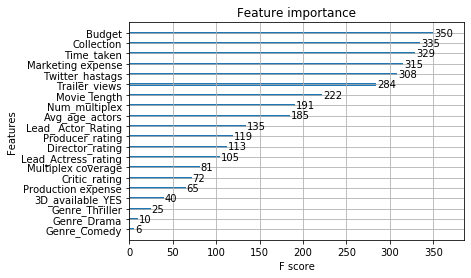

In [84]:
xgb.plot_importance(xgb_clf)

In [85]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


xgb.plot_tree(xgb_clf, num_trees = 1) # check why this is not working 

### Grid Search to Optimize XG Boosting Method

In [120]:
xgb_clf1 = xgb.XGBClassifier(n_estimators= 1000, learning_rate= 0.3, random_state= 0)

In [121]:
params_grid = {
    'max_depth' : range(3,10,2),
    'gamma'     : [0,0.1,0.2,0.3],
    'colsample_bytree' : [0.8,0.9,1],
    'reg_aplha' : [1e-2,0,0.1,1]
}

In [122]:
grid = GridSearchCV(xgb_clf1,params_grid,cv =5, n_jobs= -1, scoring='accuracy')

In [123]:
grid.fit(x_train,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'gamma': [0, 0.1, 0.2, 0.3],
                         'max_depth': range(3, 10, 2),

In [124]:
cv_xgb_clf = grid.best_estimator_

In [125]:
accuracy_score(y_test,cv_xgb_clf.predict(x_test))

0.6274509803921569

In [126]:
grid.best_params_

{'colsample_bytree': 0.9, 'gamma': 0.2, 'max_depth': 9, 'reg_aplha': 0.01}